In [44]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df.job_skills.apply(lambda skills: ast.literal_eval(skills) if pd.notna(skills) else skills)
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [52]:
df_DA_skill_exploded = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")].copy().explode("job_skills")
df_DA_skill_exploded = df_DA_skill_exploded.dropna(subset="salary_year_avg")
df_DA_skill_exploded

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,python,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,r,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,alteryx,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,tableau,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
180,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.0,NaN,California Health & Wellness,excel,"{'analyst_tools': ['excel', 'powerpoint']}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,sql,"{'analyst_tools': ['tableau', 'excel', 'altery..."
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,vba,"{'analyst_tools': ['tableau', 'excel', 'altery..."
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,tableau,"{'analyst_tools': ['tableau', 'excel', 'altery..."
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,excel,"{'analyst_tools': ['tableau', 'excel', 'altery..."


In [53]:
df_skills_demanded = df_DA_skill_exploded.groupby(by="job_skills").agg(
  job_post_count = ("job_title_short", "size"),
  median_salary = ("salary_year_avg", "median")
)
df_skills_demanded

,job_post_count,median_salary
job_skills,,
airflow,44,116250.00
airtable,5,90000.00
alteryx,106,106281.25
angular,8,107500.00
ansible,1,159640.00
...,...,...
wire,4,74250.00
word,461,81194.75
workfront,3,75000.00


In [54]:
df_skills_demanded.reset_index(inplace=True)
df_skills_demanded

,job_skills,job_post_count,median_salary
0,airflow,44,116250.00
1,airtable,5,90000.00
2,alteryx,106,106281.25
3,angular,8,107500.00
4,ansible,1,159640.00
...,...,...,...
165,wire,4,74250.00
166,word,461,81194.75
167,workfront,3,75000.00
168,wrike,1,75000.00


In [60]:
df_most_asked_skills = df_skills_demanded.sort_values("job_post_count", ascending=False).head(10).sort_values("median_salary", ascending=False)
df_most_paid_skills = df_skills_demanded.sort_values("median_salary", ascending=False).head(10)

In [49]:
df_most_asked_skills

,job_skills,job_post_count,median_salary
175,sql,34452,91000.00
54,excel,27519,84392.00
186,tableau,19311,92875.00
141,python,18382,97500.00
156,sas,13200,90000.00
145,r,11659,92500.00
135,power bi,11630,90000.00
212,word,7611,81194.75
137,powerpoint,7175,85000.00
125,oracle,5109,96923.75


In [57]:
df_most_paid_skills

,job_skills,job_post_count,median_salary
37,dplyr,2,196250.0
15,bitbucket,3,189000.0
53,gitlab,3,186000.0
131,solidity,1,179000.0
59,hugging face,1,175000.0
28,couchbase,1,160515.0
4,ansible,1,159640.0
83,mxnet,2,149000.0
19,cassandra,6,148250.0
160,vmware,1,147500.0


(0.0, 200000.0)

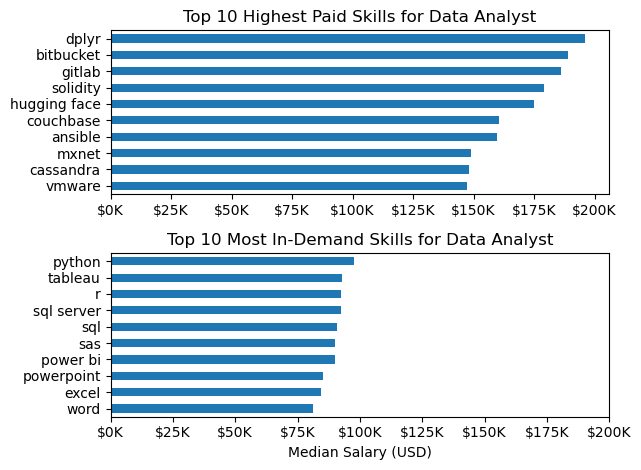

In [61]:
fig, ax = plt.subplots(2, 1)

df_most_paid_skills.plot(
  kind="barh",
  x="job_skills",
  y="median_salary",
  ylabel="",
  xlabel="",
  title="Top 10 Highest Paid Skills for Data Analyst",
  legend=False,
  ax=ax[0]
)

df_most_asked_skills.plot(
  kind="barh",
  x="job_skills",
  y="median_salary",
  ylabel="",
  xlabel="Median Salary (USD)",
  title="Top 10 Most In-Demand Skills for Data Analyst",
  legend=False,
  ax=ax[1]
)

ax[0].invert_yaxis()
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda salary, pos: f"${int(salary/1000)}K"))

ax[1].invert_yaxis()
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda salary, pos: f"${int(salary/1000)}K"))

plt.tight_layout()
plt.xlim(0, 200000)
